<a href="https://colab.research.google.com/github/nupatige/Templates_Machine-learning/blob/main/03_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

## Read the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Templates/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Data information 

In [ ]:
# shape of the DataFrame
data.shape

(400, 5)

In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Splitting independent & dependent(Target) variables

In [ ]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

## Data Transformation

### Feature scaling

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
mean = np.mean(x, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(x, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


## Train test split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

## Logistic Regression

### Instantiate the model

In [ ]:
log_Reg = LogisticRegression(random_state=0)

### Fitting or training the model

In [ ]:
log_Reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [ ]:
y_pred = log_Reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
# Comparing the predicted y value to actual y_test data.
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

### Confusion matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[43,  6],
       [ 3, 28]])

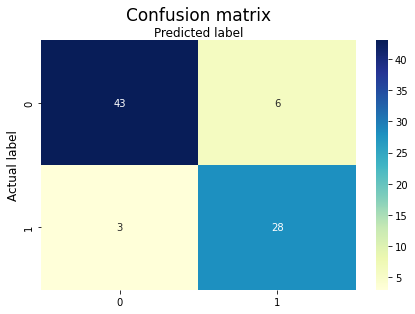

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize=17)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
plt.show()

### Accuracy, Precision & Recall

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8875
Precision: 0.8235294117647058
Recall: 0.9032258064516129


### ROC Curve & AUC 

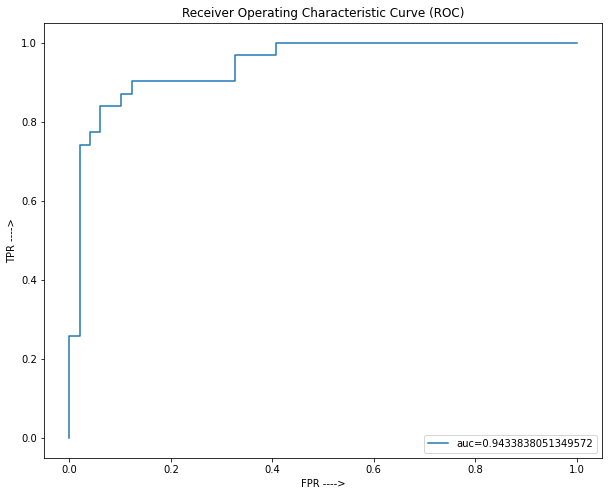

In [ ]:
y_pred_proba = log_Reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

### Classification report

In [ ]:
print(metrics.classification_report(y_test, y_pred, labels=class_names))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        49
           1       0.82      0.90      0.86        31

    accuracy                           0.89        80
   macro avg       0.88      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



## Visualization 

### Training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


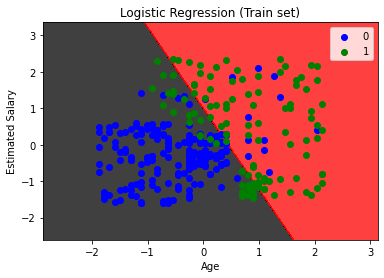

In [ ]:
x_set,y_set = x_train,y_train
X1,X2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,1].min() - 1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_Reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','red')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set == j,1],
               c=ListedColormap(['blue','green'])(i),label=j)

plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Testing set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


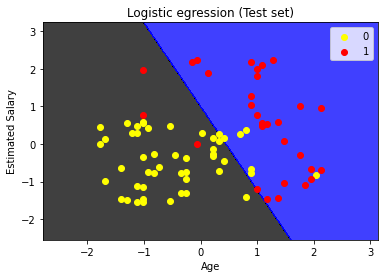

In [ ]:
x_set,y_set = x_test,y_test
X1,X2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,1].min() - 1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_Reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set == j,1],
               c=ListedColormap(['yellow','red'])(i),label=j)

plt.title('Logistic egression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()